# Notebook for Figure 1

### Figure 1C-F

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


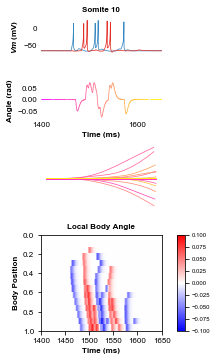

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Import pandas for data saving
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
from pylab import *

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

### FIGURE SETUP ###

# Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(3, 5))
#fig = plt.figure(constrained_layout=False, figsize=(9, 15))

widths = [4.7, 0.3]
heights = [1.75, 1.75, 3,  4.5]
gs = fig.add_gridspec(nrows=4, ncols=2, width_ratios=widths, height_ratios=heights)

# Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#Declare line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75

#Declare font sizes
SMALL_SIZE = 8 # 7
MEDIUM_SIZE = 16
BIGGER_SIZE = 6
STANDARD_FONT_SIZE = 7

FONT_STYLE = 'bold'

# Discretization time used in the simulations
dt = 0.1

#Declare min and max time, x and y-axis values
time_min = 1400
time_max = 1650 

ymin=time_min
ymax=time_max

x_start = 1400
x_end = 1650

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title    

### END OF FIGURE SETUP ###

#This function computes midlines
def compute_midlines(Time, angle):
    
    midlines = []
    for i,t in enumerate(Time):
        X = [np.cos(np.sum(angle[i,:j])) for j in range(len(angle[i]))]
        X = [np.sum(X[:i]) for i in range(len(X))]
        Y = [np.sin(np.sum(angle[i,:j])) for j in range(len(angle[i]))]
        Y = [np.sum(Y[:i]) for i in range(len(Y))]

        midlines.append((X,Y))

    return midlines

#import data from a simulation saved into a .csv file
read_data = pd.read_csv("Beat_and_Glide_10000ms.csv")

data_top = list(read_data.columns.values.tolist())
data_top

MN_index = []
dI6_index = [] 
V0v_index = []  
V2a_index = [] 
V1_index = []
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('dI6') != -1):
        dI6_index.append(int(data_top[i][data_top[i].find('dI6')+3:data_top[i].find('dI6')+5]))
        ndI6 = max(dI6_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('V1') != -1):
        V1_index.append(int(data_top[i][data_top[i].find('V1')+2:data_top[i].find('V1')+4]))
        nV1 = max(V1_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nMN
VLMN = read_sim[1:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
VLdI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
VRdI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
VLV1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
VRV1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


### Calculate angles

vmin_=-0.1 
vmax_=0.1

nmax = len(VLMuscle[0,:])
nMuscle = len(VLMuscle[:,0])

# Allocating arrays for velocity and position
vel = np.zeros((nMuscle, nmax))
pos = np.zeros((nMuscle, nmax))

# Setting constants and initial values for vel. and pos.
khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
w0 = 2.5 #2.5  #20Hz = 125.6
vel0 = 0.0
pos0 = 0.0
Wd = w0

for k in range (0,nMuscle):
    vel[k,0] = vel0    #Sets the initial velocity
    pos[k,0] = pos0    #Sets the initial position
    pos[nMuscle-1,0] = 0.0
    for i in range(1,nmax):

        vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
        pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]

pos2 = pos.transpose()
angle = pos2
FFT = zeros((nmax,nMuscle-1))
FFT2 = zeros((int(nmax/2),nMuscle-1))

### Plot MN firing and angle Panel Fig. 1C-D ###

nMN = len(VLMN[:,0])
cmapL = matplotlib.cm.get_cmap('Blues')
cmapR = matplotlib.cm.get_cmap('Reds')

#Add two subplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
 
right_side = ax1.spines["right"]
top_side = ax1.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)


# plotting muscle traces
ax0.plot(Time, VLMN[9,:], c=cmapL((9+1)/nMN), linewidth=LINEWIDTH) # adding a collor gradiant, darker color -> rostrally located
ax0.plot(Time, VRMN[9,:], c=cmapR((9+1)/nMN), linewidth=LINEWIDTH)
ax0.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
ax0.tick_params(axis='both', which='major', labelsize=SMALL_SIZE) #tick parameters

#Remove all borders
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)

#Tick set-up
ax0.tick_params(axis='both', which='both', length=0)
ax0.set_xticks([900, 1000])
ax0.set_yticks([i*50 + -50 for i in range(0,2)])

#CONSTANTS
NPOINTS = time_max-time_min
#COLOR='blue'
RESFACT=10
MAP='spring' # choose carefully, or color transitions will not appear smoooth

# Choose a color map, loop through the colors, and assign them to the color 
# cycle. You need NPOINTS-1 colors, because you'll plot that many lines 
# between pairs. In other words, your line is not cyclic, so there's 
# no line from end to beginning
cm = plt.get_cmap(MAP)
#ax0.set_prop_cycle(color=[cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
ax1.set_prop_cycle(color=[cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])

for i in range(NPOINTS-1):
    ax1.plot(Time[time_min*10 + i*10: time_min*10 + (i+1)*10],angle[time_min*10 + i*10: time_min*10 + (i+1)*10, 10], linewidth = LINEWIDTH)

#Tick set-up
ax1.set_ylabel('Angle (rad)', fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
ax1.tick_params(axis='both', which='major', labelsize=SMALL_SIZE)

#Remove all borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis='both', which='both', length=0)
ax1.set_xticks([i*200 for i in range(0,12)])
#ax1.set_yticks([i*50 + -50 for i in range(0,2)])

ax1.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #x-axis label for ax1
ax0.set_title('Somite 10', fontsize= SMALL_SIZE, fontweight=FONT_STYLE) # title for ax0
ax0.set_xlim([time_min,time_max]) #x-axis limit for ax0
ax1.set_xlim([time_min,time_max]) #x-axis limit for ax1

### Calculate angles

vmin_=-0.1 
vmax_=0.1

nmax = len(VLMuscle[0,:])
nMuscle = len(VLMuscle[:,0])

# Allocating arrays for velocity and position
vel = np.zeros((nMuscle, nmax))
pos = np.zeros((nMuscle, nmax))

# Setting constants and initial values for vel. and pos.
khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
w0 = 2.5 #2.5  #20Hz = 125.6
vel0 = 0.0
pos0 = 0.0
Wd = w0

for k in range (0,nMuscle):
    vel[k,0] = vel0    #Sets the initial velocity
    pos[k,0] = pos0    #Sets the initial position
    pos[nMuscle-1,0] = 0.0
    for i in range(1,nmax):

        vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
        pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]

pos2 = pos.transpose()
angle = pos2
FFT = zeros((nmax,nMuscle-1))
FFT2 = zeros((int(nmax/2),nMuscle-1))

### Body angles - Panel Fig. 1F ###
fig_angle = fig.add_subplot(gs[-1, 0])

im=fig_angle.pcolormesh(np.arange(nmax)*dt, np.arange(1, nMuscle+1)/nMuscle, pos, cmap=plt.cm.bwr, vmin=-0.1, vmax=0.1)

fig_angle.set_title('Local Body Angle', fontsize = SMALL_SIZE, fontweight = FONT_STYLE) #plot titles
fig_angle.set_ylabel('Body Position', fontsize = SMALL_SIZE, fontweight = FONT_STYLE) # y-axis title
fig_angle.set_xlim(time_min, time_max) # x-axis limit
fig_angle.set_yticks([i*0.2 for i in range(0,6)]) #y-axis ticks
fig_angle.set_ylim([1.0, 0.0]) #y-axis limit
fig_angle.set_xlabel('Time (ms)', fontsize = SMALL_SIZE, fontweight = FONT_STYLE) #x-axis title

for item in (fig_angle.get_xticklabels() + fig_angle.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)

# Set up color map for Panel Fig. 1F    
axes = plt.subplot(gs[-1,1])    
cbar = fig.colorbar(im, cax=axes)
cbar.ax.tick_params(labelsize=SMALL_SIZE-2)
cbar.ax.ticklabel_format(axis = 'both', style='sci')

### Body midlines - Panel Fig. 1E ###
fig_midlines = fig.add_subplot(gs[2, 0]) 
#Calculate midlines
midlines = compute_midlines(Time[time_min*10:time_max*10], angle[time_min*10:time_max*10])

#remove borders
for side in ["top", "right", "bottom", "left"]:
    fig_midlines.spines[side].set_visible(False)

#CONSTANTS
nMIDLINES = int((time_max-time_min)/10) #number of midlines to plot
INTERVAL = 10 #interval between midlines to plot
MAP='spring' # choose carefully, or color transitions will not appear smoooth

# Choose a color map, loop through the colors, and assign them to the color 
# cycle. You need NPOINTS-1 colors, because you'll plot that many lines 
# between pairs. In other words, your line is not cyclic, so there's 
# no line from end to beginning
cm = plt.get_cmap(MAP)
#ax0.set_prop_cycle(color=[cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
fig_midlines.set_prop_cycle(color=[cm(1.*i/(nMIDLINES-1)) for i in range(nMIDLINES-1)])

#plot every INTERVAL midlines
for i,t in enumerate(Time[time_min*10:time_max*10]):
    if t%INTERVAL == 0:
        (X,Y) = midlines[i]
        fig_midlines.plot(X, Y, linewidth = LINEWIDTH)
fig_midlines.set_xticks([])
fig_midlines.set_yticks([])

plt.tight_layout()

plt.savefig("Figure 1.png", dpi=1000)

plt.show()